In [1]:
import numpy as np # used for handling numbers

In [2]:
import pandas as pd # used for handling the dataset

In [3]:
from sklearn.impute import SimpleImputer # used for handling missing data

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split # used for splitting training and testing data

In [6]:
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [7]:
import seaborn as sns

In [8]:
dataset = pd.read_csv('diamonds.csv') # to import the dataset

In [9]:
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
dataset.drop(index=0,axis=1,inplace=True)
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
dataset.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [12]:
dataset.isnull().sum() #find null data

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Melihat korelasi pada dataset

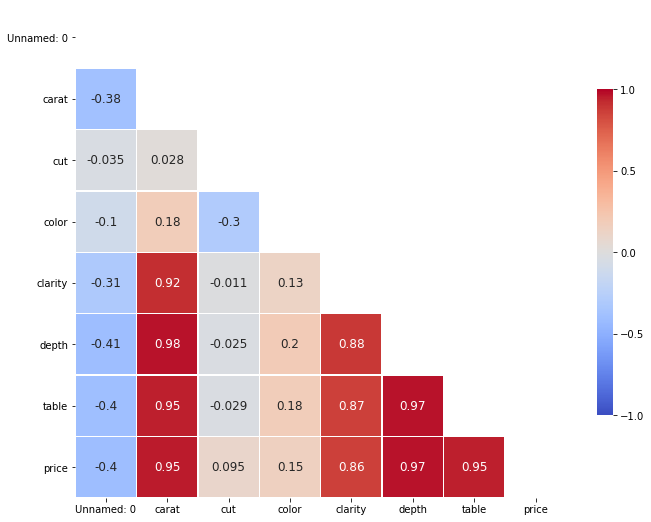

In [13]:
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
Triu = np.triu_indices_from(mask)
mask[Triu] = True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(dataset.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(dataset.columns, rotation = 0)
ax.set_xticklabels(dataset.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

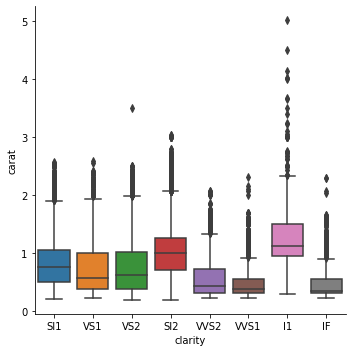

In [30]:
# melihat kelompok data clarity berdasarkan carat
sns.catplot(x='clarity', y='carat',kind='box',data=dataset)

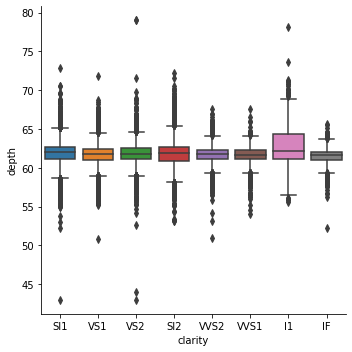

In [20]:
# melihat kelompok data clarity berdasarkan depth
sns.catplot(x='clarity',y='depth',kind='box', data=dataset)

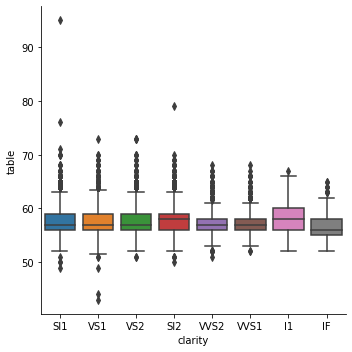

In [31]:
# melihat kelompok data clarity berdasarkan table
sns.catplot(x='clarity',y='table',kind='box', data=dataset)

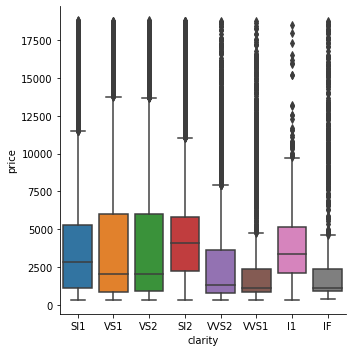

In [32]:
# melihat kelompok data clarity berdasarkan price
sns.catplot(x='clarity',y='price',kind='box', data=dataset)

In [ ]:
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

In [ ]:
categorical_feature_mask # Categorical boolean mask

In [ ]:
categorical_cols # filter categorical columns using mask and turn it into a list

In [ ]:
# Get dummies
dataset = pd.get_dummies(dataset, prefix_sep='_', drop_first=True)

In [ ]:
dataset

In [ ]:
dataset.shape


In [ ]:
carat = dataset['carat']
carat

In [ ]:
depth = dataset['depth']
depth

In [ ]:
table = dataset['table']
table

In [ ]:
y= dataset["price"]
y

In [ ]:
# plt.plot(y,carat, 'o')
plt.plot(y,carat)
plt.title("price independent")
plt.xlabel("price")
plt.ylabel("carat")

plt.show()